<a href="https://colab.research.google.com/github/kavy9/Numpy-and-pandas-prac/blob/main/my_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Please refer to Emotion_final.csv data from kaggle
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tqdm.notebook import tqdm
import re

In [2]:
'''
https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958
https://www.kaggle.com/suryaaseran/emotion-prediction-from-text
'''

'\nhttps://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958\nhttps://www.kaggle.com/suryaaseran/emotion-prediction-from-text\n'

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Emotion_final.csv')

In [4]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [6]:
df=df.dropna()

In [7]:
voc_size=10000
#vocabalary_size

In [8]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [9]:
X=df[:]['Text']
y=df['Emotion']

In [10]:
y==df[:]['Emotion']

0        True
1        True
2        True
3        True
4        True
         ... 
21454    True
21455    True
21456    True
21457    True
21458    True
Name: Emotion, Length: 21459, dtype: bool

In [11]:
df['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [12]:
messages=X.reset_index()

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords

In [15]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
def Stemm(message):
    review = re.sub('[^a-zA-Z]', ' ', message)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [16]:
from tqdm import tqdm
tqdm.pandas()


In [17]:
df['Text']=df['Text'].progress_apply(Stemm)

100%|██████████| 21459/21459 [00:59<00:00, 357.84it/s]


In [18]:
df

,Text,Emotion
0,didnt feel humili,sadness
1,go feel hopeless damn hope around someon care ...,sadness
2,im grab minut post feel greedi wrong,anger
3,ever feel nostalg fireplac know still properti,love
4,feel grouchi,anger
...,...,...
21454,melissa stare friend dism,fear
21455,success state elect seen govern parti pummel d...,fear
21456,vincent irrit dismay,fear
21457,kendal hume turn back face dismay coup,fear


kaggle

In [19]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus[:10]

['didnt feel humili',
 'go feel hopeless damn hope around someon care awak',
 'im grab minut post feel greedi wrong',
 'ever feel nostalg fireplac know still properti',
 'feel grouchi',
 'ive feel littl burden late wasnt sure',
 'ive take milligram time recommend amount ive fallen asleep lot faster also feel like funni',
 'feel confus life teenag jade year old man',
 'petrona year feel petrona perform well made huge profit',
 'feel romant']

In [21]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.callbacks import ModelCheckpoint
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

In [22]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [23]:
#Finding max words
l = 0
for x in corpus:
    l = max(l,len(x.split(' ')))
print(l)

35


In [24]:
sent_length=35
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 8326 6255   51]
 [   0    0    0 ... 5367 7184  840]
 [   0    0    0 ... 6255 7536 4634]
 ...
 [   0    0    0 ... 3046 4694 5605]
 [   0    0    0 ...  313 5605 7008]
 [   0    0    0 ...    0 5605 6869]]


In [25]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 8326,
       6255,   51], dtype=int32)

In [26]:
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 100)           1000000   
_________________________________________________________________
dropout (Dropout)            (None, 35, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3

In [27]:
label_encoder = preprocessing.LabelEncoder()

X_final=np.array(embedded_docs)
y = label_encoder.fit_transform(y)
y_final=np.array(y)
print(y_final)

[4 4 0 ... 1 1 1]


In [28]:
X_final.shape,y_final.shape

((21459, 35), (21459,))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=21)

In [67]:
model_save = ModelCheckpoint('weights.h5', save_best_only = True, save_weights_only = True, monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=256,callbacks = [model_save])

Epoch 1/10
61/61 [==============================] - 13s 216ms/step - loss: 0.5166 - accuracy: 0.9283 - val_loss: 0.8326 - val_accuracy: 0.8509

Epoch 00001: val_loss improved from inf to 0.83258, saving model to weights.h5
Epoch 2/10
61/61 [==============================] - 14s 223ms/step - loss: 0.4956 - accuracy: 0.9331 - val_loss: 0.8147 - val_accuracy: 0.8538

Epoch 00002: val_loss improved from 0.83258 to 0.81467, saving model to weights.h5
Epoch 3/10
61/61 [==============================] - 13s 219ms/step - loss: 0.4622 - accuracy: 0.9430 - val_loss: 0.8656 - val_accuracy: 0.8393

Epoch 00003: val_loss did not improve from 0.81467
Epoch 4/10
61/61 [==============================] - 13s 219ms/step - loss: 0.4516 - accuracy: 0.9449 - val_loss: 0.8518 - val_accuracy: 0.8567

Epoch 00004: val_loss did not improve from 0.81467
Epoch 5/10
61/61 [==============================] - 14s 221ms/step - loss: 0.4353 - accuracy: 0.9494 - val_loss: 0.8666 - val_accuracy: 0.8445

Epoch 00005: val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


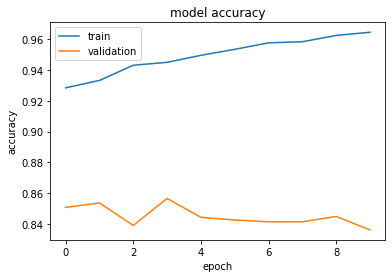

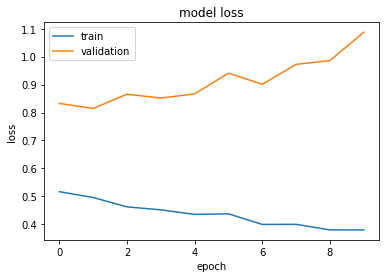

In [68]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [69]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [70]:
model.load_weights('weights.h5')

In [71]:
y_pred = model.predict(X_test)

In [72]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
print(y_pred)

[[0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]]


In [73]:
y_pred[0]

array([0, 0, 1, 0, 0, 0])

In [74]:
y_test.shape

(4292,)

In [75]:
y_pred[0]

array([0, 0, 1, 0, 0, 0])

In [76]:
np.where(y_pred[0]==np.amax(y_pred[0]))[0][0]

2

In [77]:
for item in y_pred:
  print(type(item))
  break

<class 'numpy.ndarray'>


In [78]:
from tqdm import tqdm

In [86]:
dicto={
    0:'sadness',
    1:'anger',
    2:'love',
    3:'surprise',
    4:'fear',
    5:'happy'
}
def list_to_emotion(list_):
  listo=[]
  for item in tqdm(list_):
    listo.append(np.where(item==np.amax(item))[0][0])
  return listo

In [87]:
test_fn_y=list_to_emotion(y_pred)

100%|██████████| 4292/4292 [00:00<00:00, 83588.11it/s]


In [88]:
test_fn_y=np.array(test_fn_y)

In [89]:
test_fn_y[:5]

array([2, 0, 4, 4, 3])

In [85]:
y_test[:6]

array([2, 0, 4, 4, 3, 0])

In [90]:
print(accuracy_score(y_test,test_fn_y))

0.848089468779124


In [91]:
y_pred=test_fn_y

In [92]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.80125   0.82982   0.81529       617
           1    0.81215   0.83051   0.82123       531
           2    0.88192   0.86531   0.87354      1381
           3    0.71333   0.67296   0.69256       318
           4    0.91366   0.91151   0.91258      1277
           5    0.62983   0.67857   0.65330       168

    accuracy                        0.84809      4292
   macro avg    0.79203   0.79811   0.79475      4292
weighted avg    0.84878   0.84809   0.84828      4292



Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


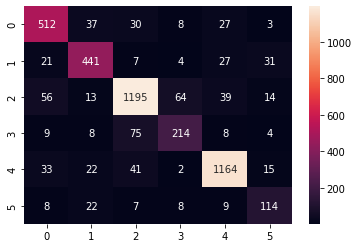

In [93]:
print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt="d"))

In [94]:
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'anger': 0, 'fear': 1, 'happy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}


In [95]:
def predict_emotion(stri):
    review = re.sub('[^a-zA-Z]', ' ', stri)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    onehot_repr = [one_hot(review,voc_size)] 
    embed = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
    predicti = model.predict(embed)
    return label_encoder.classes_[np.argmax(predicti)]

In [96]:
predict_emotion('He is an arrogant and rude person')

'anger'